In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

## Loading the Dataset

In [2]:
bank_classification = pd.read_csv('bank-classification.csv')
print('number of samples: ', len(bank_classification))

number of samples:  41188


## Looking briefly at the data

In [3]:
bank_classification.head()

id  birth_date        job  marital    education  default housing loan  \
0   1  1952-03-23  housemaid  married     basic.4y       no      no   no   
1   2  1951-03-24   services  married  high.school  unknown      no   no   
2   3  1971-05-19   services  married  high.school       no     yes   no   
3   4  1968-01-24     admin.  married     basic.6y       no      no   no   
4   5  1952-05-11   services  married  high.school       no      no  yes   

  contact_date    contact  campaign  pdays  previous     poutcome        y  
0   2008-05-12  telephone         1    999         0  nonexistent       no  
1   2008-05-26  telephone         1    999         0  nonexistent  unknown  
2   2008-05-05  telephone         1    999         0  nonexistent       no  
3   2008-05-19  telephone         1    999         0  nonexistent  unknown  
4   2008-05-19  telephone         1    999         0  nonexistent  unknown

In [4]:
bank_classification.describe()

id      campaign         pdays      previous
count  41188.00000  41188.000000  41188.000000  41188.000000
mean   20594.50000      2.567593    962.475454      0.172963
std    11890.09578      2.770014    186.910907      0.494901
min        1.00000      1.000000      0.000000      0.000000
25%    10297.75000      1.000000    999.000000      0.000000
50%    20594.50000      2.000000    999.000000      0.000000
75%    30891.25000      3.000000    999.000000      0.000000
max    41188.00000     56.000000    999.000000      7.000000

## Looking at the 'y' column

In [5]:
bank_classification.groupby('y').size()

y
no         18419
unknown    20389
yes         2380
dtype: int64

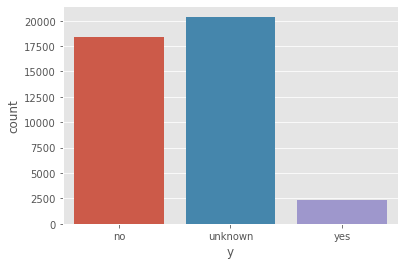

In [6]:
sns.countplot(x='y', data=bank_classification)

## Feature Engineering

### Replacing dates with numbers

In [7]:
bank_classification['birth_date_toordinal'] = bank_classification['birth_date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal())

bank_classification['contact_year'] = pd.DatetimeIndex(bank_classification['contact_date']).year.map(lambda x: str(x))
bank_classification['contact_month'] = pd.DatetimeIndex(bank_classification['contact_date']).month.map(lambda x: str(x))
bank_classification['contact_day'] = pd.DatetimeIndex(bank_classification['contact_date']).day.map(lambda x: str(x))
bank_classification['contact_dayofweek'] = pd.DatetimeIndex(bank_classification['contact_date']).dayofweek.map(lambda x: str(x))

bank_classification.head()

id  birth_date        job  marital    education  default housing loan  \
0   1  1952-03-23  housemaid  married     basic.4y       no      no   no   
1   2  1951-03-24   services  married  high.school  unknown      no   no   
2   3  1971-05-19   services  married  high.school       no     yes   no   
3   4  1968-01-24     admin.  married     basic.6y       no      no   no   
4   5  1952-05-11   services  married  high.school       no      no  yes   

  contact_date    contact  campaign  pdays  previous     poutcome        y  \
0   2008-05-12  telephone         1    999         0  nonexistent       no   
1   2008-05-26  telephone         1    999         0  nonexistent  unknown   
2   2008-05-05  telephone         1    999         0  nonexistent       no   
3   2008-05-19  telephone         1    999         0  nonexistent  unknown   
4   2008-05-19  telephone         1    999         0  nonexistent  unknown   

   birth_date_toordinal contact_year contact_month contact_day  \
0                712670         2008             5          12   
1                712305         2008             5          26   
2                719666         2008             5           5   
3                718455         2008             5          19   
4                712719         2008             5          19   

  contact_dayofweek  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [8]:
bank_classification.drop(columns=['birth_date', 'contact_date'], inplace=True)
bank_classification.head()

id        job  marital    education  default housing loan    contact  \
0   1  housemaid  married     basic.4y       no      no   no  telephone   
1   2   services  married  high.school  unknown      no   no  telephone   
2   3   services  married  high.school       no     yes   no  telephone   
3   4     admin.  married     basic.6y       no      no   no  telephone   
4   5   services  married  high.school       no      no  yes  telephone   

   campaign  pdays  previous     poutcome        y  birth_date_toordinal  \
0         1    999         0  nonexistent       no                712670   
1         1    999         0  nonexistent  unknown                712305   
2         1    999         0  nonexistent       no                719666   
3         1    999         0  nonexistent  unknown                718455   
4         1    999         0  nonexistent  unknown                712719   

  contact_year contact_month contact_day contact_dayofweek  
0         2008             5          12                 0  
1         2008             5          26                 0  
2         2008             5           5                 0  
3         2008             5          19                 0  
4         2008             5          19                 0

### Replacing 'previous', 'campaign' and 'pdays' numbers with strings

In [9]:
cols_to_modify = ['previous', 'campaign', 'pdays']

for col_name in cols_to_modify:
    bank_classification[col_name] = bank_classification[col_name].map(lambda y: str(y))

### Numerical Features

In [10]:
cols_num = ['birth_date_toordinal']

### Categorical Features

In [11]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',  'poutcome', 'contact_year', 'contact_month', 'contact_day', 'contact_dayofweek', 'campaign', 'pdays', 'previous']
cols_new_cat = pd.get_dummies(bank_classification[cols_cat])
cols_new_cat.head()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              1   
1           0                0                 0              0   
2           0                0                 0              0   
3           1                0                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   job_technician  ...  pdays_9  pdays_999  previous_0  previous_1  \
0               0  ...        0          1           1           0   
1               0  ...        0          1           1           0   
2               0  ...        0          1           1           0   
3               0  ...        0          1           1           0   
4               0  ...        0          1           1           0   

   previous_2  previous_3  previous_4  previous_5  previous_6  previous_7  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0  

[5 rows x 164 columns]

In [12]:
bank_classification = pd.concat([bank_classification[cols_num], bank_classification['y'], cols_new_cat],axis=1)
bank_classification.head()

birth_date_toordinal        y  job_admin.  job_blue-collar  \
0                712670       no           0                0   
1                712305  unknown           0                0   
2                719666       no           0                0   
3                718455  unknown           1                0   
4                712719  unknown           0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              1               0            0   
1                 0              0               0            0   
2                 0              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  ...  pdays_9  pdays_999  previous_0  \
0                  0             0  ...        0          1           1   
1                  0             1  ...        0          1           1   
2                  0             1  ...        0          1           1   
3                  0             0  ...        0          1           1   
4                  0             1  ...        0          1           1   

   previous_1  previous_2  previous_3  previous_4  previous_5  previous_6  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   previous_7  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 166 columns]

## Slice data to predict and with given 'y'

In [13]:
bank_to_predict = bank_classification.loc[bank_classification['y'] == 'unknown']
bank_given = bank_classification.loc[bank_classification['y'] != 'unknown']

## Get Y

In [14]:
Y_given = bank_given['y']
Y_given.head()

0    no
2    no
5    no
7    no
8    no
Name: y, dtype: object

In [15]:
Y_given = Y_given.replace(['yes','no'],[1,0])
Y_given.head()

0    0
2    0
5    0
7    0
8    0
Name: y, dtype: int64

## Get X

In [16]:
X_to_predict = bank_to_predict.drop(['y'], axis=1)
X_given = bank_given.drop(['y'], axis=1)
X_given.head()

birth_date_toordinal  job_admin.  job_blue-collar  job_entrepreneur  \
0                712670           0                0                 0   
2                719666           0                0                 0   
5                716726           0                0                 0   
7                718171           0                1                 0   
8                724413           0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   
2              0               0            0                  0   
5              0               0            0                  0   
7              0               0            0                  0   
8              0               0            0                  0   

   job_services  job_student  ...  pdays_9  pdays_999  previous_0  previous_1  \
0             0            0  ...        0          1           1           0   
2             1            0  ...        0          1           1           0   
5             1            0  ...        0          1           1           0   
7             0            0  ...        0          1           1           0   
8             0            0  ...        0          1           1           0   

   previous_2  previous_3  previous_4  previous_5  previous_6  previous_7  
0           0           0           0           0           0           0  
2           0           0           0           0           0           0  
5           0           0           0           0           0           0  
7           0           0           0           0           0           0  
8           0           0           0           0           0           0  

[5 rows x 165 columns]

## Split data to train and test

In [17]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_given, Y_given, test_size=0.2, random_state=258)
X_train.head()

birth_date_toordinal  job_admin.  job_blue-collar  job_entrepreneur  \
17292                717213           0                1                 0   
22431                716388           0                0                 0   
26672                720909           0                1                 0   
7144                 717783           0                0                 0   
32260                720686           0                1                 0   

       job_housemaid  job_management  job_retired  job_self-employed  \
17292              0               0            0                  0   
22431              0               0            0                  0   
26672              0               0            0                  0   
7144               0               0            0                  1   
32260              0               0            0                  0   

       job_services  job_student  ...  pdays_9  pdays_999  previous_0  \
17292             0            0  ...        0          1           1   
22431             1            0  ...        0          1           1   
26672             0            0  ...        0          1           0   
7144              0            0  ...        0          1           1   
32260             0            0  ...        0          1           0   

       previous_1  previous_2  previous_3  previous_4  previous_5  previous_6  \
17292           0           0           0           0           0           0   
22431           0           0           0           0           0           0   
26672           1           0           0           0           0           0   
7144            0           0           0           0           0           0   
32260           1           0           0           0           0           0   

       previous_7  
17292           0  
22431           0  
26672           0  
7144            0  
32260           0  

[5 rows x 165 columns]

## Let's calculate prevalence 'yes' in Y_train and Y_test

In [18]:
def calc_prevalence(Y):
    return sum(Y)/len(Y)

In [19]:
calc_prevalence(Y_train.values)

0.11418955466073683

In [20]:
calc_prevalence(Y_test.values)

0.11538461538461539

## Time to fit our model and check it on test data.

In [21]:
model=GradientBoostingClassifier(n_estimators=200, random_state=3254)
model.fit(X_train, Y_train)
prediction=model.predict(X_test)
accuracy_score(Y_test, prediction)

0.8944711538461538

## Let's predict our data and save them to csv file in the correct format

In [22]:
prediction = model.predict_proba(X_to_predict)[:, 1]
prediction = pd.DataFrame(prediction)

prediction['id'] = X_to_predict.index.values.tolist()
prediction['id'] = prediction['id'].map(lambda x: x+1)

prediction = prediction.rename(columns={0: 'y'})
prediction = prediction.reindex(columns=['id', 'y'])

prediction.to_csv('result.csv', index=False)